In [1]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [2]:
data_root = './data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=3.79s)


# Stats about the Dataset

In [3]:
# print stats about the given dataset
print('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print('%s refs are in split [%s].' % (len(ref_ids), split))

dataset [refcoco_unc] contains: 
142210 expressions for 50000 refs in 19994 images.

Among them:
42404 refs are in split [train].
3811 refs are in split [val].
3785 refs are in split [test].


# Show Refered Object and its Expressions

ref_id [32220] (ann_id [1337535])
1. black car parked next to 20 sign
2. first parked car
[262.11, 324.94, 268.58, 335.73, 305.26, 336.81, 304.18, 360.54, 316.04, 346.52, 310.65, 253.75, 286.92, 255.91, 273.98, 268.85, 256.72, 293.66]
[317.12, 247.28, 359.19, 248.36, 391.55, 277.48, 404.49, 282.88, 404.49, 291.51, 389.39, 296.9, 409.89, 331.42, 412.04, 347.6, 354.88, 350.83, 319.28, 346.52]


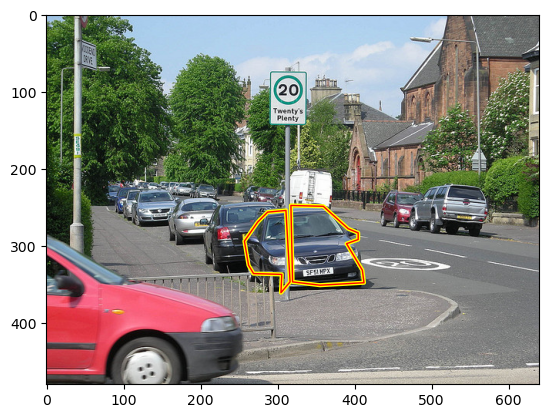

In [4]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. black car parked next to 20 sign
2. first parked car


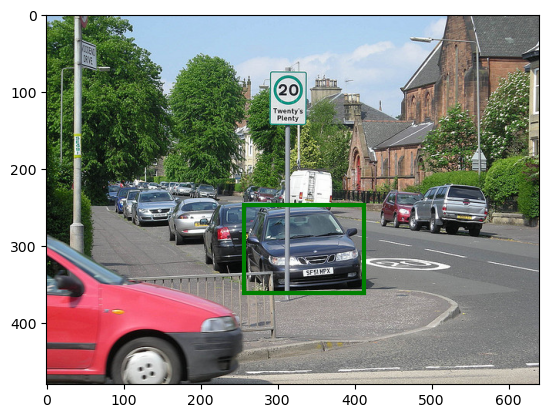

In [5]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [6]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))

sent_id[91620]: black car parked next to 20 sign
sent_id[91621]: first parked car
